<a href="https://colab.research.google.com/github/vsinyutsina/deep_learning/blob/master/kernel7d2bf6657e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Обработка данных

In [0]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
from fastai.vision import *

In [0]:
with open('/kaggle/input/ships-in-satellite-imagery/shipsnet.json') as f:
  loaded_file = json.load(f)

In [0]:
def parse_list_image(data):
    return np.array(data, dtype=np.uint8).reshape((3,80,80)).T

In [0]:
for i in range(len(loaded_file['data'])):
    loaded_file['data'][i] = parse_list_image(loaded_file['data'][i])

In [0]:
loaded_file['data'][0]

array([[[ 82,  94,  80],
        [ 89, 100,  86],
        [ 91, 101,  88],
        [ 81,  93,  81],
        ...,
        [ 93, 101,  90],
        [ 89,  98,  87],
        [ 87,  99,  87],
        [ 88,  99,  85]],

       [[ 89,  99,  86],
        [ 91, 102,  88],
        [ 93, 104,  92],
        [ 85,  97,  84],
        ...,
        [ 91,  99,  88],
        [ 88,  98,  86],
        [ 88,  99,  86],
        [ 91, 101,  87]],

       [[ 91, 101,  89],
        [ 89, 101,  89],
        [ 86,  98,  85],
        [ 81,  93,  81],
        ...,
        [ 91, 100,  89],
        [ 92, 102,  89],
        [ 91, 101,  88],
        [ 90, 101,  87]],

       [[ 87,  99,  86],
        [ 88,  99,  86],
        [ 85,  96,  84],
        [ 83,  94,  82],
        ...,
        [ 93, 103,  92],
        [ 92, 102,  90],
        [ 89, 100,  88],
        [ 88, 100,  87]],

       ...,

       [[ 91, 103,  87],
        [ 92, 105,  89],
        [ 79,  90,  76],
        [ 86,  94,  82],
        ...,
        [ 92, 

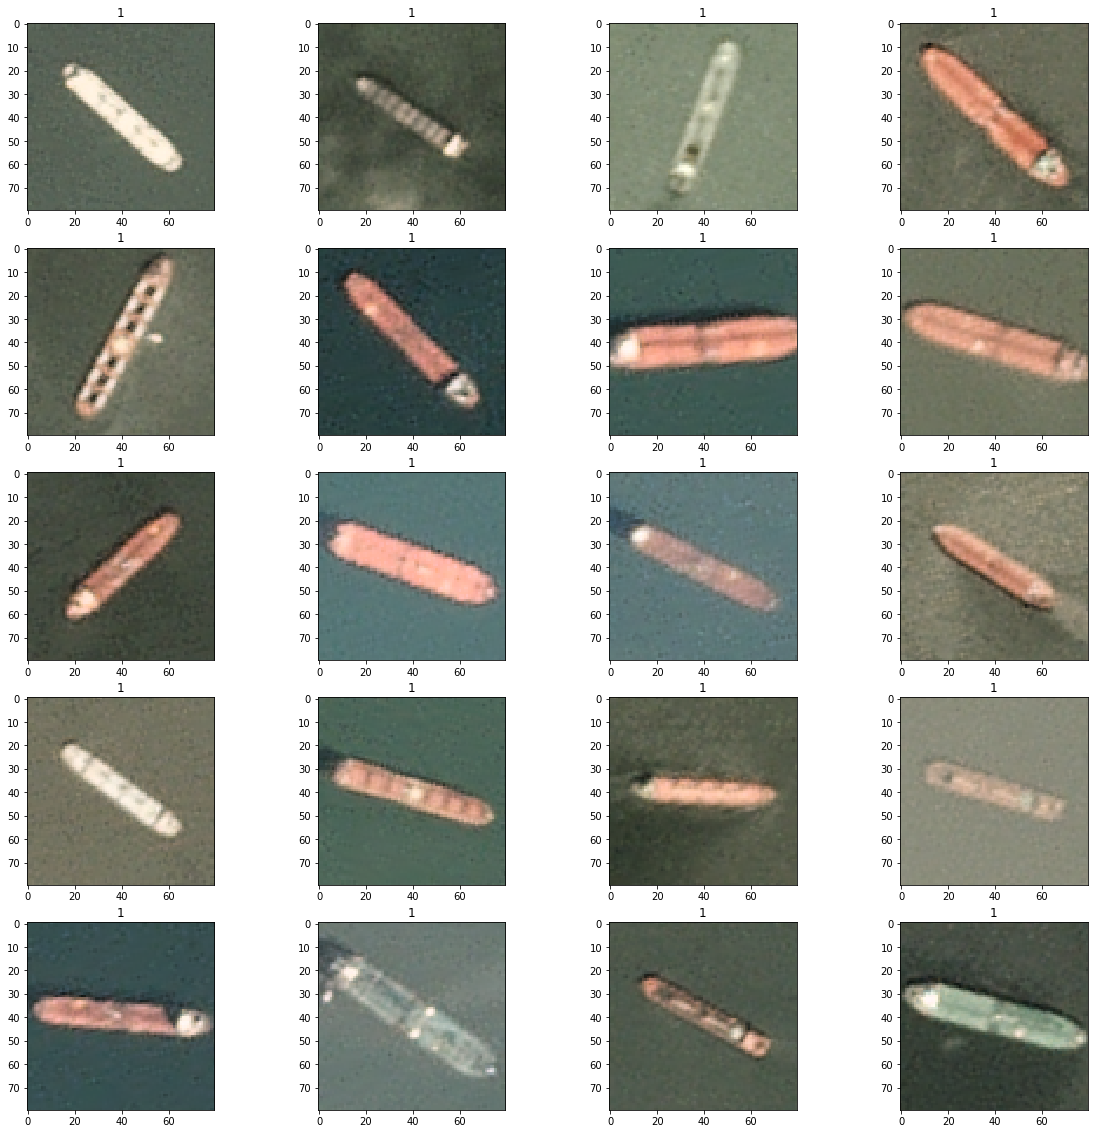

In [0]:
plt.figure(figsize = (20, 20))

for i in range(20):
    plt.subplot(5, 4, (i + 1))
    plt.imshow(loaded_file['data'][i])
    plt.title(loaded_file['labels'][i])

## Создание модели

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(loaded_file['data'], loaded_file['labels'], random_state = 12)
X_trn, X_tst, y_trn, y_test =  train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_trn, y_trn, test_size = 0.1)
X_train = np.array(X_train) / 255 - 0.5
X_val = np.array(X_val) / 255 - 0.5
X_test = np.array(X_tst) / 255 - 0.5
y_train, y_test, y_val = np.array(y_train), np.array(y_test), np.array(y_val)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    vertical_flip=True,
    height_shift_range=0.1
)

In [0]:
datagen.fit(X_train)

In [0]:
def reset_tf_session():
    curr_session = tf.compat.v1.get_default_session()
    if curr_session is not None:
        curr_session.close()
    tf.keras.backend.clear_session()
    config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=4,
                        inter_op_parallelism_threads=4, 
                        allow_soft_placement=True,
                        device_count = {'CPU' : 1,
                                        'GPU' : 1}
                       )
    config.gpu_options.allow_growth = True
    s = tf.compat.v1.InteractiveSession(config=config)
    tf.compat.v1.keras.backend.set_session(s)
    return s

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, ELU, BatchNormalization

def make_model(initializer='lecun_uniform', num_of_filters = 512):

    model = Sequential()
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), input_shape=(80,80,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))  
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))  
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))  
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(Conv2D(filters=num_of_filters, padding='same', kernel_size=(3,3), kernel_initializer=initializer))  
    model.add(ELU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_of_filters, kernel_initializer=initializer))
    model.add(ELU(0.1))
    model.add(BatchNormalization())    
    model.add(Dense(2, kernel_initializer=initializer))             
    model.add(Activation("softmax"))
    
    return model

## Обучение модели

In [0]:
from tensorflow.keras.models import save_model, load_model

class ModelSaveCallback(tf.keras.callbacks.Callback):

    def __init__(self, model, file_name):
        super().__init__()
        self.file_name = file_name
        self.model = model

    def on_epoch_end(self, epoch, logs=None):
        save_model(self.model, self.file_name.format(epoch))
        print('{}'.format(self.file_name.format(epoch)))

In [0]:
def load_from_file(model_filename, last_epoch):
    return load_model(model_filename.format(last_epoch))

In [0]:
def train_gen_model(train_gen, X_val, y_val, X_test, y_test, make_model, initial_epoch=0, initial_lr=5e-3, epochs=10, batch_size=32):
    model_filename = '\nweights_{0:02d}.hdf5'
    s = reset_tf_session()
    model = make_model()
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr=initial_lr),
        metrics=['accuracy']
    )

    def lr_scheduler(epoch):
        return initial_lr * 0.9 ** epoch
    
    if initial_epoch != 0:
        model = load_from_file(model_filename, initial_epoch)
    
    hist = model.fit_generator(
        train_gen,
        epochs=epochs,
        callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler),
                   ModelSaveCallback(model, model_filename)
                  ],
        validation_data=(X_val, y_val),
        shuffle=True,
        verbose=1,
        initial_epoch = initial_epoch
    )
        
    return hist, model
    

In [0]:
hist, model = train_gen_model(datagen.flow(X_train, y_train, batch_size=32), X_val, y_val, X_test, y_test, make_model)

Train for 102 steps, validate on 360 samples
Epoch 1/10
101/102 [============================>.] - ETA: 0s - loss: 0.7220 - accuracy: 0.7011
weights_00.hdf5
102/102 [==============================] - 47s 465ms/step - loss: 0.7202 - accuracy: 0.7015 - val_loss: 0.7497 - val_accuracy: 0.7556
Epoch 2/10
101/102 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.7360
weights_01.hdf5
102/102 [==============================] - 38s 372ms/step - loss: 0.5949 - accuracy: 0.7355 - val_loss: 0.6289 - val_accuracy: 0.5806
Epoch 3/10
101/102 [============================>.] - ETA: 0s - loss: 0.5676 - accuracy: 0.7456
weights_02.hdf5
102/102 [==============================] - 38s 373ms/step - loss: 0.5681 - accuracy: 0.7451 - val_loss: 0.5531 - val_accuracy: 0.7556
Epoch 4/10
101/102 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7503
weights_03.hdf5
102/102 [==============================] - 38s 372ms/step - loss: 0.5302 - accuracy: 0.7509 - val_loss: 0

## Анализ полученной модели

In [0]:
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(f'accuracy on test: {test_eval[1]}')

accuracy on test: 0.9474999904632568


In [0]:
!ls

?weights_00.hdf5  ?weights_03.hdf5  ?weights_06.hdf5  ?weights_09.hdf5
?weights_01.hdf5  ?weights_04.hdf5  ?weights_07.hdf5  __notebook_source__.ipynb
?weights_02.hdf5  ?weights_05.hdf5  ?weights_08.hdf5


In [0]:
loss = hist.history['loss']

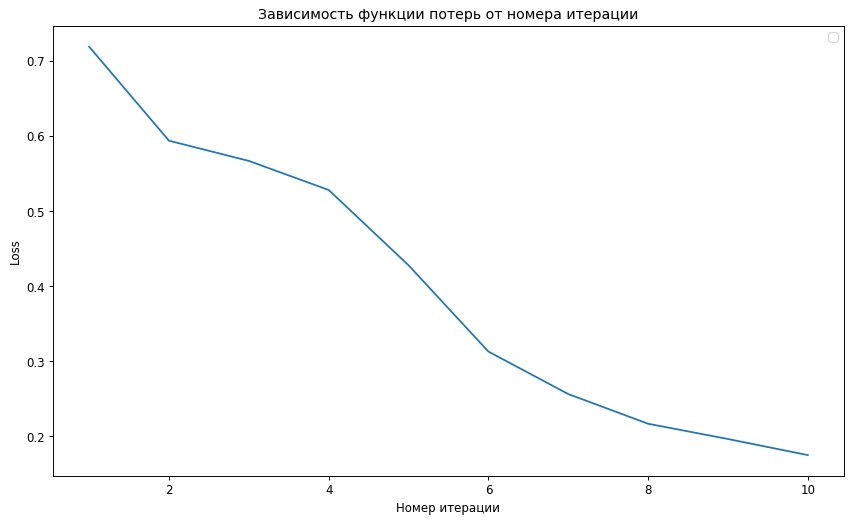

In [0]:
fig = plt.figure(0, figsize=(12,7), dpi=85)

plt.plot(range(1,11),loss)

plt.xlabel('Номер итерации')
plt.ylabel('Loss')
plt.title('Зависимость функции потерь от номера итерации')
plt.legend() 

In [0]:
predict = model.predict(X_test)

In [0]:
pd.DataFrame(predict).head()

,0,1
0,0.998145,0.001855
1,0.024620,0.975380
2,0.997166,0.002834
3,0.994418,0.005582
4,0.996257,0.003743


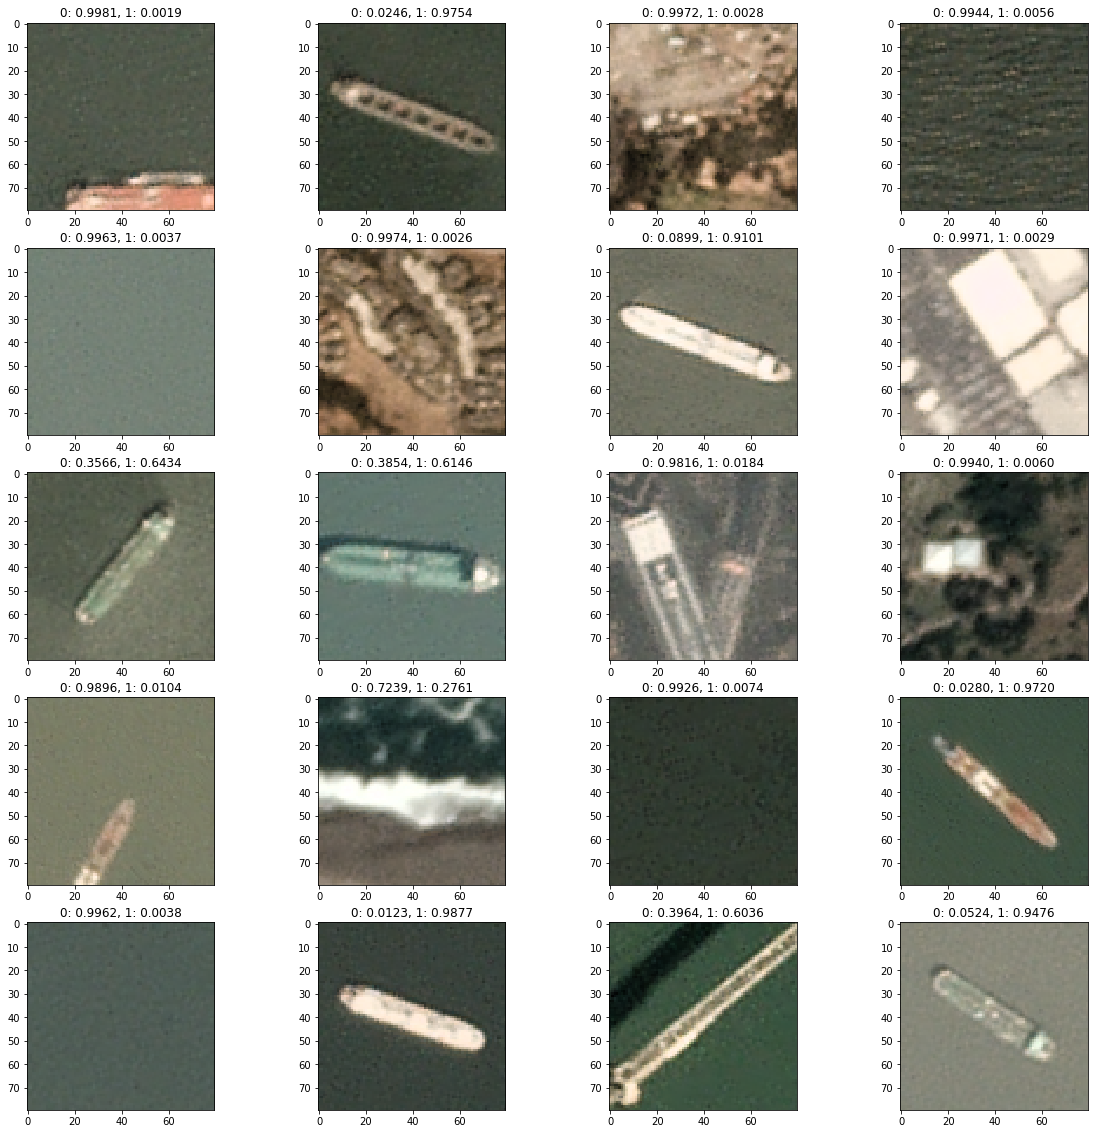

In [0]:
plt.figure(figsize = (20, 20))

for i in range(20):
    plt.subplot(5, 4, (i + 1))
    plt.imshow(X_tst[i])
    plt.title(f'0: {predict[i][0]:.4f}, 1: {predict[i][1]:.4f}' )

In [0]:
for i in np.arange(len(predict)):
    if predict[i][0] > predict[i][1]:
        predict[i] = 0
    else:
        predict[i] = 1

In [0]:
loss_on_test = sum((y_test - [sum(i)/2 for i in predict])**2)/len(y_test)

In [0]:
loss_on_test

array([[0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.]], dtype=float32)